In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
house=pd.read_csv('./datasets/train.csv')
print(house.shape)
house.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
nulls=pd.DataFrame(house.isna().sum(),columns=['nan_count'])
nulls[nulls['nan_count']>0]

,nan_count
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


From the above, the features that are above the threshold of 5% i.e.. is 73 cannot be dropped 
1) The columns Alley,PoolQC,Fence, MiscFeature have mostly same NA values , hence can be dropped
2) We can use dropna on MasVnrType,MasVnrArea, BsmtQual, BsmtCond, BsmtExposure,BsmtFinType1, BsmtFinType2, Electrical

In [4]:
#Dropping columns and missing values below threshold
house.drop(['Alley','PoolQC','Fence', 'MiscFeature'],axis=1,inplace=True)
house.dropna(subset=['MasVnrType','MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'Electrical'],inplace=True)

In [5]:
nulls=pd.DataFrame(house.isna().sum(),columns=['nan_count'])
print(house.shape)
nulls[nulls['nan_count']>0]

(1412, 77)


,nan_count
LotFrontage,251
FireplaceQu,657
GarageType,74
GarageYrBlt,74
GarageFinish,74
GarageQual,74
GarageCond,74


Going through the data description of the dataset, 
1) We can infer that nan values in the columns FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond are not actually missing instead represent that there is no such provision. Hence replacing nan with string 'Na'.
2) Whereas LotFrontage, has missing values which needs to be imputed

In [6]:
#Replacing nan with string 'Na' 
house.loc[house['GarageType'].isna(),'GarageType']='Na'
house.loc[house['FireplaceQu'].isna(),'FireplaceQu']='Na'
house.loc[house['GarageFinish'].isna(),'GarageFinish']='Na'
house.loc[house['GarageQual'].isna(),'GarageQual']='Na'
house.loc[house['GarageCond'].isna(),'GarageCond']='Na'

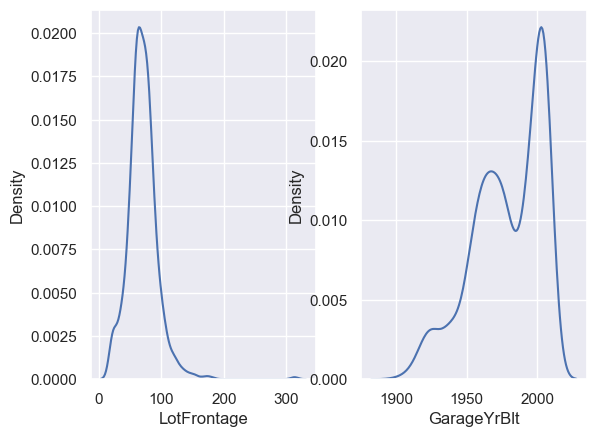

In [7]:
#Imputing the missing values by looking at the distribution
fig,ax=plt.subplots(1,2)
sns.kdeplot(x=house['LotFrontage'],ax=ax[0])
sns.kdeplot(x=house['GarageYrBlt'],ax=ax[1])
plt.show()

In [8]:
# As both are skewed, median is the perfect choice to impute missing values
#Simple median might not be apt and we look for finding the median based on MSZoning
house.loc[house['GarageYrBlt'].isna(),'GarageYrBlt']=int(house['GarageYrBlt'].median())
'''year_median=house.groupby('GarageFinish')['GarageYrBlt'].median().to_dict()
house['GarageYrBlt'].fillna(house['GarageYrBlt'].map(year_median))'''

lot_median=house.groupby('MSZoning')['LotFrontage'].median().to_dict()
house['LotFrontage'].fillna(house['MSZoning'].map(lot_median),inplace=True)


In [9]:
house['LotFrontage']=house['LotFrontage'].astype('int')
house['GarageYrBlt']=house['GarageYrBlt'].astype('int')

In [10]:
nulls=pd.DataFrame(house.isna().sum(),columns=['nan_count'])
nulls[nulls['nan_count']>0]

,nan_count


Data Pre Processsing

1) Id is a useless column , so drop it
2) Check value counts of each categorical column, if any particular i/p is extremely present drop that column
  i) Drop columns ['Id','Street','Utilities','Condition2','Exterior2nd','RoofMatl', 'Heating','LandSlope','RoofMatl','Exterior2nd','BsmtFinSF1','BsmtFinSF2']
  

In [11]:
#Checking with columns
#house['Street'].value_counts() # As pave dominates drop this column
#house['LotShape'].value_counts()
#house['LandContour'].value_counts()
#house['Utilities'].value_counts() # As Allpub dominates drop this column
#house['LotConfig'].value_counts()
#house['LandSlope'].value_counts()  # Can be considered for dropping
#house['Neighborhood'].value_counts()
#house['Condition1'].value_counts() #Condition2 is redundant so drop it
#house['RoofMatl'].value_counts()
#house['Heating'].value_counts()  #RoofMatl, Heating can also be dropped as one value dominates heavily
#house['BldgType'].value_counts()
#house['HouseStyle'].value_counts()
#house['RoofStyle'].value_counts()
#house['RoofMatl'].value_counts() # As CompShg dominates drop this column
#house['Exterior1st'].value_counts() #Exterior2nd is redundant column so drop it
#house['Exterior2nd'].value_counts()
#house['HouseStyle'].value_counts()
#house['BsmtFinSF2'].value_counts() #BsmtFinSF1 and BsmtFinSF2 can be dropped as we use TotalBsmtSF
#house['HeatingQC'].value_counts()
#house['CentralAir'].value_counts()
#house['Electrical'].value_counts()
#house['FireplaceQu'].value_counts()
#house['GarageCond'].value_counts()
house['PavedDrive'].value_counts()

Y    1303
N      80
P      29
Name: PavedDrive, dtype: int64

In [12]:
cols_to_drop=['Id','Street','Utilities','Condition2','Exterior2nd','RoofMatl', 'Heating','LandSlope','RoofMatl','Exterior2nd','BsmtFinSF1','BsmtFinSF2']

house.drop(cols_to_drop,inplace=True,axis=1)

In [13]:
numeric_cols=house.select_dtypes('int').columns.to_list()
numeric_cols

print(house.shape)
house

(1412, 67)


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62,7917,Reg,Lvl,Inside,Gilbert,Norm,1Fam,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85,13175,Reg,Lvl,Inside,NWAmes,Norm,1Fam,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66,9042,Reg,Lvl,Inside,Crawfor,Norm,1Fam,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68,9717,Reg,Lvl,Inside,NAmes,Norm,1Fam,...,112,0,0,0,0,4,2010,WD,Normal,142125


More detailed analysis on to the columns is required for better understanding
Let us proceed further with the data we cleaned

In [14]:
object_=house.select_dtypes('object')
object_cols=object_.columns.tolist()

for i in object_cols:
    house[i]=house[i].astype('category')

categorical=house.select_dtypes('category')

To perform feature selection using f_classif we must convert the categorical features into numerical, using Label encoder to do so as there are only finite no. of unique values in a single variable. Further we can use one hot encoding while building model.

This method of applying must be avoided
---------------------------------------------------------------
house_copy=house.copy()

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

house_encoded=house_copy.apply(le.fit_transform)
    
house_encoded

In [15]:
house_copy=house.copy()

from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

house_copy[object_cols]= house_copy[object_cols].apply(le.fit_transform)

house_encoded=house_copy
house_encoded

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65,8450,3,3,4,5,2,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80,9600,3,3,2,24,1,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68,11250,0,3,4,5,2,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60,9550,0,3,0,6,2,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84,14260,0,3,2,15,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62,7917,3,3,4,8,2,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85,13175,3,3,4,14,2,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66,9042,3,3,4,6,2,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68,9717,3,3,4,12,2,0,...,112,0,0,0,0,4,2010,8,4,142125


In [16]:
from sklearn.feature_selection import SelectKBest, f_regression, SelectPercentile

x=house_encoded.drop('SalePrice',axis=1)
y=house_encoded['SalePrice']

selector=SelectKBest(f_regression,k='all')
#selector.fit(X_train_sel,y_train_sel)
selector.fit(x,y)
feature_sel=pd.DataFrame()
feature_sel['score']=selector.scores_
feature_sel['p_value']=selector.pvalues_
feature_sel['feature_name']=selector.get_feature_names_out()

feature_sel

,score,p_value,feature_name
0,9.611079,1.972366e-03,MSSubClass
1,40.714533,2.383934e-10,MSZoning
2,183.981113,1.748321e-39,LotFrontage
3,106.325331,4.377070e-24,LotArea
4,95.622567,6.776750e-22,LotShape
...,...,...,...
61,0.248973,6.178767e-01,MiscVal
62,2.462441,1.168218e-01,MoSold
63,0.769924,3.803901e-01,YrSold
64,3.386061,6.595990e-02,SaleType


Now we use select top percentile function to select only those features that are about top 50-60% 

In [17]:
selector_top=SelectPercentile(f_regression,percentile=80)
selected_features=selector_top.fit_transform(x,y)

cols_indices_in_model=selector_top.get_support(indices=True)

cols_to_be_in_model=x.iloc[:,cols_indices_in_model].columns.to_list()

cols_to_be_in_model

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'Neighborhood',
 'Condition1',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'SaleCondition']

The above is a list of columns that are significant in regression model. Let us build a model to predict the price of a house

In [18]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
kfold=KFold(n_splits=10,random_state=123,shuffle=True)

final_features=scaler.fit_transform(house_encoded[cols_to_be_in_model])
final_target=house_encoded['SalePrice']

X_train,X_test,y_train,y_test=train_test_split(final_features,final_target,test_size=0.26,random_state=75)


In [44]:
#Fit the linear Regression Model
from sklearn.linear_model import LogisticRegression,Ridge,Lasso
from sklearn.metrics import accuracy_score,classification_report,f1_score,recall_score,precision_score,confusion_matrix

log=LogisticRegression()
ridge=Ridge()
lasso=Lasso()

classifiers=[('Logistic',log),("Ridge",ridge),("Lasso",lasso)]

params={
    'tol':[0.000001,0.0001,0.01,0.1,1],
    'max_iter':[1000,10000,10000000]
    
}
#'solver':['lsqr','sag']
#grid_search=GridSearchCV(estimator=log,param_grid=params,cv=kfold,n_jobs=-1,scoring='f1')

#grid_search.fit(X_train,y_train)
log.fit(X_train,y_train)

#best_params=grid_search.best_params_
#best_estimator=grid_search.best_estimator_
#best_score=grid_search.best_score_

y_pred=log.predict(X_test)

verifying=pd.DataFrame()
verifying['Actual']=y_test
verifying['Predicted']=np.round(y_pred).astype('int')
verifying

C:\Users\pspra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Actual,Predicted
317,270000,266000
878,148000,125000
1006,163500,180000
1261,128900,110000
731,187500,165000
...,...,...
658,97500,118500
1178,154900,137450
530,175000,187500
71,129500,110000


In [45]:
accuracy=accuracy_score(y_test,y_pred)
#precision=precision_score(y_test,y_pred)
#recall=recall_score(y_test,y_pred)
f1_score=f1_score(y_test,y_pred,average=None)

print(f'Accuracy SCore is {accuracy}')
#print(f'Precision is {precision}')
#print(f'Recall is {recall}')
print(f'F1 SCore is {f1_score}')

y_pred_proba=log.predict_proba(X_test)

confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

Accuracy SCore is 0.010869565217391304
F1 SCore is [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.  

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Label encoding should not be applied on whole dataFrame as it changes even numeric variables. Let us apply one hot encoding to verify the model performance. 

In [ ]:
house_dummies=pd.get_dummies(house_copy)

from sklearn.feature_selection import SelectKBest, f_regression, SelectPercentile

x_d=house_dummies.drop('SalePrice',axis=1)
y_d=house_dummies['SalePrice']

selector_d=SelectKBest(f_regression,k='all')
#selector.fit(X_train_sel,y_train_sel)
selector_d.fit(x,y)
feature_d=pd.DataFrame()
feature_d['score']=selector_d.scores_
feature_d['p_value']=selector_d.pvalues_
feature_d['feature_name']=selector_d.get_feature_names_out()

In [ ]:
selector_top_d=SelectPercentile(f_regression,percentile=80)
selected_features_d=selector_top_d.fit_transform(x,y)

cols_indices_in_model_d=selector_top_d.get_support(indices=True)

cols_to_be_in_model_d=x_d.iloc[:,cols_indices_in_model_d].columns.to_list()

cols_to_be_in_model_d

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler_d=StandardScaler()

final_features_d=scaler_d.fit_transform(house_dummies[cols_to_be_in_model_d])
final_target_d=house_dummies['SalePrice']

X_train_d,X_test_d,y_train_d,y_test_d=train_test_split(final_features_d,final_target_d,test_size=0.2,random_state=57)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

reg_d=LinearRegression()

reg_d.fit(X_train_d,y_train_d)

y_pred_d=reg_d.predict(X_test_d)

mse_d=mean_squared_error(y_test_d,y_pred_d)
rmse_d=mean_squared_error(y_test_d,y_pred_d,squared=False)
R_squared_d=r2_score(y_test_d,y_pred_d)

verifying_d=pd.DataFrame()
verifying_d['Actual']=y_test_d
verifying_d['Predicted']=np.round(y_pred_d).astype(int)

In [ ]:
print(f'Mean Squared error is {mse_d}')
print(f'Root Mean Squared error is {rmse_d}')
print(f'R squared value is {R_squared_d}')

In [ ]:
verifying_d